PHYS 29
Yizhi Jiao
Homework 6

Problem 1a

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize as opt
import warnings
warnings.filterwarnings('ignore')

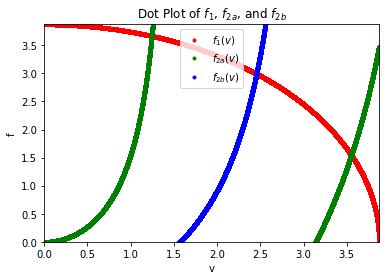

In [100]:
v = np.linspace(0,15**0.5,100000)
def f_1(x): return (15-x**2)**0.5
def f_2a(x): return x*np.tan(x)
def f_2b(x): return -x/np.tan(x)
def delta_a(x): return (15-x**2)**0.5-x*np.tan(x)
def delta_b(x): return (15-x**2)**0.5-(-x/np.tan(x))
plt.title("Dot Plot of $f_1$, $f_{2a}$, and $f_{2b}$")
plt.plot(v, f_1(v), '.', color ="r", label="$f_1(v)$")
plt.plot(v, f_2a(v), '.', color ="g", label="$f_{2a}(v)$")
plt.plot(v, f_2b(v), '.', color ="b", label="$f_{2b}(v)$")
plt.xlim(0,np.sqrt(15))
plt.ylim(0,15**0.5)
plt.legend(loc='upper center')
plt.ylabel('f')
plt.xlabel('v')
plt.show()

As the dot plot shows, there are three intersects.

Problem 1b

In [101]:
print("Bisect")
print("intersect 1: v = ",opt.bisect(delta_a,1e-19,np.pi/2-1e-19), "and E = ", 2*opt.bisect(delta_a,1e-19,np.pi/2-1e-19)**2)
print("intersect 2: v = ",opt.bisect(delta_b,np.pi/2+1e-19,np.pi), "and E = ", 2*opt.bisect(delta_b,np.pi/2+1e-19,np.pi)**2)
print("intersect 3: v = ",opt.bisect(delta_a,np.pi,15**0.5), "and E = ", 2*opt.bisect(delta_a,np.pi,15**0.5)**2)

Bisect
intersect 1: v =  1.243843303227678 and E =  3.094292325968683
intersect 2: v =  2.455026478354211 and E =  12.054310018840559
intersect 3: v =  3.5517502816916076 and E =  25.229860126992826


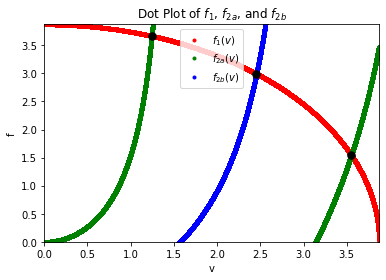

In [102]:
plt.title("Dot Plot of $f_1$, $f_{2a}$, and $f_{2b}$")
plt.plot(v, f_1(v), '.', color ="r", label="$f_1(v)$")
plt.plot(v, f_2a(v), '.', color ="g", label="$f_{2a}(v)$")
plt.plot(v, f_2b(v), '.', color ="b", label="$f_{2b}(v)$")
plt.plot(opt.bisect(delta_a,1e-19,np.pi/2-1e-19),f_1(opt.bisect(delta_a,1e-19,np.pi/2-1e-19)), '.', color ="k", markersize  = 15)
plt.plot(opt.bisect(delta_b,np.pi/2+1e-19,np.pi),f_1(opt.bisect(delta_b,np.pi/2+1e-19,np.pi)), '.', color ="k", markersize  = 15)
plt.plot(opt.bisect(delta_a,np.pi,15**0.5),f_1(opt.bisect(delta_a,np.pi,15**0.5)), '.', color ="k", markersize  = 15)
plt.xlim(0,np.sqrt(15))
plt.ylim(0,15**0.5)
plt.legend(loc='upper center')
plt.ylabel('f')
plt.xlabel('v')
plt.show()


Problem 2

In [103]:
h=6.626e-34
k_B=1.380649e-23
c=np.longdouble(299792458)
def F_nu(T, nu):
    return 2*np.pi*h*np.power(nu,3)/np.power(c,2)*(1/(np.exp(h*nu/(k_B*T))-1))

In [104]:
def F_1(nu): return F_nu(310.15,nu)
def F_2(nu): return F_nu(5778, nu)
def deriv_center(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

In [109]:
x = np.linspace(1*10**5,1*10**16,100001)
max_1 = np.max(F_1(x))
max_2 = np.max(F_2(x))
max_in_1 = np.argmax(F_1(x))*(np.longdouble(1*10**16)-np.longdouble(1*10**5))/np.longdouble(100001)
max_in_2 = np.argmax(F_2(x))*(np.longdouble(1*10**16)-np.longdouble(1*10**5))/np.longdouble(100001)

print("maximum of 310.15K: ",np.max(F_1(x))," at frequency", max_in_1,"Hz")
print("maximum of 5778K: ",np.max(F_2(x))," at frequency", max_in_2,"Hz")

TypeError: 'numpy.ndarray' object is not callable

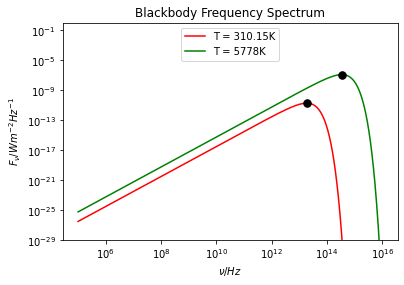

In [106]:
nu = np.linspace(1*10**5,1*10**16,100000)
F_1 = F_nu(310.15, nu)
F_2 = F_nu(5778, nu)
plt.title("Blackbody Frequency Spectrum")
plt.plot(nu, F_1, color ="r", label="T = 310.15K")
plt.plot(nu, F_2, color ="g", label="T = 5778K")
plt.plot(max_in_1, max_1, '.', color ="k", markersize  = 15)
plt.plot(max_in_2, max_2, '.', color ="k", markersize  = 15)
plt.legend(loc='upper center')
plt.yscale('log')
plt.xscale('log')
plt.ylim(10e-30,1)
plt.ylabel('$F_\\nu / Wm^{-2}Hz^{-1}$')
plt.xlabel('$\\nu / Hz$')
plt.show()

The maximum is shown on the plot.

In [107]:
x_1 = h*max_1/(k_B*310.15)
(3-x_1)*np.e**x_1-3

0.0

In [108]:
x_2 = h*max_1/(k_B*5778)
(3-x_2)*np.e**x_2-3

0.0

The two maxima satisfy the given relationship

In [112]:
deriv_center(lambda nu: 2*np.pi*h*np.power(nu,3)/np.power(c,2)*(1/(np.exp(h*nu/(k_B*310.15))-1)), max_in_1, 1e-9)

0.0

In [ ]:
deriv_center(lambda nu: 2*np.pi*h*np.power(nu,3)/np.power(c,2)*(1/(np.exp(h*nu/(k_B*310.15))-1)), max_in_1, 1e-9)